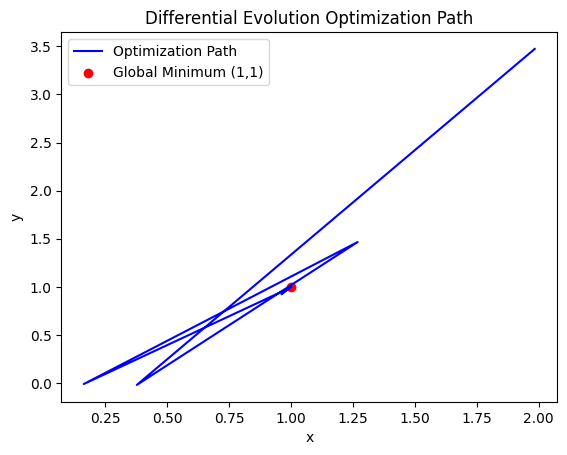

Best Solution Found: x = 1.00000, y = 1.00000
Function Value: 0.00000


In [7]:
 import numpy as np
import matplotlib.pyplot as plt

# 定义目标函数（Rosenbrock 函数）
def rosenbrock(X):
    x, y = X
    return (1 - x)**2 + 100 * (y - x**2)**2

# 差分进化算法参数
population_size = 50        # 种群数量
dimensions = 2              # 问题维度
F = 0.8                     # 缩放因子
Cr = 0.9                    # 交叉概率
num_generations = 1000      # 迭代次数
bounds = [(-5, 5), (-5, 5)] # 参数范围

# 初始化种群
population = np.random.uniform(
    [b[0] for b in bounds],
    [b[1] for b in bounds],
    size=(population_size, dimensions)
)

# 记录最优解的路径
best_solutions = []

# 差分进化算法主循环
for generation in range(num_generations):
    new_population = []
    
    for i in range(population_size):
        # 选择三个不同的个体
        idxs = [idx for idx in range(population_size) if idx != i]
        a, b, c = population[np.random.choice(idxs, 3, replace=False)]
        
        # 变异操作
        mutant_vector = a + F * (b - c)
        
        # 交叉操作
        cross_points = np.random.rand(dimensions) < Cr

        '''
        这里是一个 边界条件处理，确保至少有一个维度的值来自变异向量。若所有 cross_points 
        都是 False（即没有任何维度选择变异向量的值），则随机选择一个维度，强制使其选择变异向量的值。
        这个步骤是为了避免偶然发生 没有交叉 的情况。
        '''
        if not np.any(cross_points):
            cross_points[np.random.randint(0, dimensions)] = True
        
        trial_vector = np.where(cross_points, mutant_vector, population[i])
        #对于每个维度，如果 cross_points 中的值为 True，则选择 mutant_vector（变异向量）的值；否则选择 population[i]（当前个体）的值。
        
        # 保证边界约束
        trial_vector = np.clip(trial_vector, [b[0] for b in bounds], [b[1] for b in bounds])
        
        # 选择操作
        if rosenbrock(trial_vector) < rosenbrock(population[i]):
            new_population.append(trial_vector)
        else:
            new_population.append(population[i])
    
    population = np.array(new_population)
    
    # 记录当前最优解
    best_individual = population[np.argmin([rosenbrock(ind) for ind in population])]
    best_solutions.append(best_individual)

# 绘制最优解路径
best_solutions = np.array(best_solutions)
plt.plot(best_solutions[:, 0], best_solutions[:, 1], 'b-', label='Optimization Path')
plt.scatter(1, 1, color='red', label='Global Minimum (1,1)')
plt.title('Differential Evolution Optimization Path')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# 输出最终最优解
final_best = best_solutions[-1]
print(f"Best Solution Found: x = {final_best[0]:.5f}, y = {final_best[1]:.5f}")
print(f"Function Value: {rosenbrock(final_best):.5f}")
